<a href="https://colab.research.google.com/github/PeterTowers/pankadaum-generator/blob/main/pankadaum_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PANKADAUM Generator 2000
Uma *tentativa* de criar um gerador de letras de música automático.


---


Universidade de Brasília

Prof.: Roberta Barbosa Oliveira

Alunos:

*   Matheus Stauffer (coloque sua matrícula aqui)
*   Pedro Torres (16/0141575).

Brasília, 7 de outubro de 2021.

Dataframe: https://www.kaggle.com/neisse/scrapped-lyrics-from-6-genres?select=lyrics-data.csv

## Setup

In [1]:
# Download dataframes from Github
!wget https://github.com/PeterTowers/pankadaum-generator/raw/main/dataframes/dataframes.zip

# Unzip dataframes
!unzip "/content/dataframes.zip" -d "."

--2021-10-06 16:17:28--  https://github.com/PeterTowers/pankadaum-generator/raw/main/dataframes/dataframes.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PeterTowers/pankadaum-generator/main/dataframes/dataframes.zip [following]
--2021-10-06 16:17:29--  https://raw.githubusercontent.com/PeterTowers/pankadaum-generator/main/dataframes/dataframes.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79488219 (76M) [application/zip]
Saving to: ‘dataframes.zip’

dataframes.zip      100%[===================>]  75.81M   148MB/s    in 0.5s    

2021-10-06 16:17:30 (148 MB/s) - ‘dataframes.zip’ saved

## Análise do dataframe

In [5]:
import pandas as pd

artists_df = pd.read_csv(r"./artists-data.csv")

print(artists_df.info(), end="\n\n")
artists_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      3242 non-null   object 
 1   Songs       3242 non-null   int64  
 2   Popularity  3242 non-null   float64
 3   Link        3242 non-null   object 
 4   Genre       3242 non-null   object 
 5   Genres      3238 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 152.1+ KB
None



,Artist,Songs,Popularity,Link,Genre,Genres
0,10000 Maniacs,110,0.3,/10000-maniacs/,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
1,12 Stones,75,0.3,/12-stones/,Rock,Rock; Gospel/Religioso; Hard Rock; Grunge; Roc...
2,311,196,0.5,/311/,Rock,Rock; Surf Music; Reggae; Ska; Pop/Rock; Rock ...
3,4 Non Blondes,15,7.5,/4-non-blondes/,Rock,Rock; Pop/Rock; Rock Alternativo; Grunge; Blue...
4,A Cruz Está Vazia,13,0.0,/a-cruz-esta-vazia/,Rock,Rock


In [6]:
lyrics_df = pd.read_csv(r"./lyrics-data.csv")

print(lyrics_df.info(), end="\n\n")
lyrics_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209522 entries, 0 to 209521
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ALink   209522 non-null  object
 1   SName   209522 non-null  object
 2   SLink   209522 non-null  object
 3   Lyric   209484 non-null  object
 4   Idiom   206375 non-null  object
dtypes: object(5)
memory usage: 8.0+ MB
None



,ALink,SName,SLink,Lyric,Idiom
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH
1,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH
2,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH
3,/10000-maniacs/,A Campfire Song,/10000-maniacs/a-campfire-song.html,"A lie to say, ""O my mountain has coal veins an...",ENGLISH
4,/10000-maniacs/,Everyday Is Like Sunday,/10000-maniacs/everyday-is-like-sunday.html,Trudging slowly over wet sand. Back to the ben...,ENGLISH


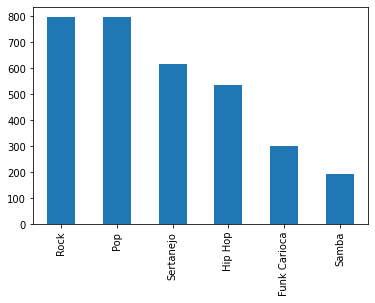

In [ ]:
# Plot lesion count as histogram
artists_df['Genre'].value_counts().plot(kind='bar')

### Remocao de letras duplicatas

In [56]:
lyrics_df.loc[lyrics_df['SName'] == "Smells Like Teen Spirit"]

,ALink,SName,SLink,Lyric,Idiom
11365,/cassia-eller/,Smells Like Teen Spirit,/cassia-eller/smells-like-teen-spirit.html,"Load up on guns, bring your friends. it's fun ...",ENGLISH
41810,/nirvana/,Smells Like Teen Spirit,/nirvana/smells-like-teen-spirit.html,Load up your guns and bring your friends. It's...,ENGLISH
41933,/nirvana/,Smells Like Teen Spirit,/nirvana/smells-like-teen-spirit.html,Load up your guns and bring your friends. It's...,ENGLISH
44748,/patti-smith/,Smells Like Teen Spirit,/patti-smith/smells-like-teen-spirit.html,Load up on guns and bring your friends. It's f...,ENGLISH
44865,/patti-smith/,Smells Like Teen Spirit,/patti-smith/smells-like-teen-spirit.html,Load up on guns and bring your friends. It's f...,ENGLISH
68757,/tori-amos/,Smells Like Teen Spirit,/tori-amos/smells-like-teen-spirit.html,Load up on guns and bring your friends. it's f...,ENGLISH
68992,/tori-amos/,Smells Like Teen Spirit,/tori-amos/smells-like-teen-spirit.html,Load up on guns and bring your friends. it's f...,ENGLISH
107778,/cassia-eller/,Smells Like Teen Spirit,/cassia-eller/smells-like-teen-spirit.html,"Load up on guns, bring your friends. it's fun ...",ENGLISH
134581,/michael-buble/,Smells Like Teen Spirit,/michael-buble/smells-like-teen-spirit.html,"Load up on guns, bring your friends. It's fun ...",ENGLISH
135539,/miley-cyrus/,Smells Like Teen Spirit,/miley-cyrus/smells-like-teen-spirit.html,Load up your guns and bring your friends. It's...,ENGLISH


In [57]:
lyrics_df.drop_duplicates(subset=['SLink', 'Lyric'], inplace=True)

lyrics_df.loc[lyrics_df['SName'] == "Smells Like Teen Spirit"]

,ALink,SName,SLink,Lyric,Idiom
11365,/cassia-eller/,Smells Like Teen Spirit,/cassia-eller/smells-like-teen-spirit.html,"Load up on guns, bring your friends. it's fun ...",ENGLISH
41810,/nirvana/,Smells Like Teen Spirit,/nirvana/smells-like-teen-spirit.html,Load up your guns and bring your friends. It's...,ENGLISH
44748,/patti-smith/,Smells Like Teen Spirit,/patti-smith/smells-like-teen-spirit.html,Load up on guns and bring your friends. It's f...,ENGLISH
68757,/tori-amos/,Smells Like Teen Spirit,/tori-amos/smells-like-teen-spirit.html,Load up on guns and bring your friends. it's f...,ENGLISH
134581,/michael-buble/,Smells Like Teen Spirit,/michael-buble/smells-like-teen-spirit.html,"Load up on guns, bring your friends. It's fun ...",ENGLISH
135539,/miley-cyrus/,Smells Like Teen Spirit,/miley-cyrus/smells-like-teen-spirit.html,Load up your guns and bring your friends. It's...,ENGLISH
207611,/sambo/,Smells Like Teen Spirit,/sambo/smells-like-teen-spirit.html,"(Chorus). Hello, hello,hello,how low. Hello,he...",ENGLISH


In [60]:
lyrics_df.loc[lyrics_df['SName'] == "Under Pressure"]

,ALink,SName,SLink,Lyric,Idiom
15007,/david-bowie/,Under Pressure,/david-bowie/under-pressure.html,"Bah, bah, bah, bah, bah, bah, bah, bah. Bah, b...",ENGLISH
30529,/keane/,Under Pressure,/keane/under-pressure.html,Pressure pushing down on me. Pressing down on ...,ENGLISH
67481,/thirty-seconds-to-mars/,Under Pressure,/thirty-seconds-to-mars/pressure.html,Do you tear under pressure?. On fire you're te...,ENGLISH
85457,/jay-z/,Under Pressure,/jay-z/under-pressure.html,"[Dr Dre:]. The long-awaited Detox, trick. 'Cau...",ENGLISH
96714,/2pac-tupac-shakur/,Under Pressure,/2pac-tupac-shakur/under-pressure.html,"(Tupac). Under Pressure. . Yeah, Babyyy. . Whe...",ENGLISH
140127,/pink/,Under Pressure,/pink/under-pressure.html,Um boom ba bay. Um boom ba bay. Um boom ba ba ...,ENGLISH


In [61]:
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157756 entries, 0 to 209521
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ALink   157756 non-null  object
 1   SName   157756 non-null  object
 2   SLink   157756 non-null  object
 3   Lyric   157756 non-null  object
 4   Idiom   157756 non-null  object
dtypes: object(5)
memory usage: 7.2+ MB


### Quantidade de idiomas

In [8]:
lyrics_df['Idiom'].value_counts()

ENGLISH           114723
PORTUGUESE         85085
SPANISH             4812
ITALIAN              626
FRENCH               471
GERMAN               314
KINYARWANDA           88
ICELANDIC             47
SWEDISH               27
FINNISH               24
INDONESIAN            17
ESTONIAN              12
GALICIAN              12
IRISH                  9
DANISH                 9
HAITIAN_CREOLE         9
BASQUE                 8
TAGALOG                7
CROATIAN               7
NORWEGIAN              7
CATALAN                6
SUNDANESE              6
DUTCH                  5
SWAHILI                5
RUSSIAN                4
MALAY                  4
SERBIAN                3
KURDISH                2
MALAGASY               2
TURKISH                2
SESOTHO                2
ARABIC                 2
NYANJA                 2
JAPANESE               2
CEBUANO                2
AFRIKAANS              1
GANDA                  1
KOREAN                 1
POLISH                 1
HUNGARIAN              1


In [11]:
lyrics_df = lyrics_df[(lyrics_df.Idiom == "ENGLISH") | (lyrics_df.Idiom == "PORTUGUESE")]

print(lyrics_df.info(), end="\n\n")
print(lyrics_df['Idiom'].value_counts(), end="\n\n")
lyrics_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199808 entries, 0 to 209521
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ALink   199808 non-null  object
 1   SName   199808 non-null  object
 2   SLink   199808 non-null  object
 3   Lyric   199808 non-null  object
 4   Idiom   199808 non-null  object
dtypes: object(5)
memory usage: 9.1+ MB
None

ENGLISH       114723
PORTUGUESE     85085
Name: Idiom, dtype: int64



,ALink,SName,SLink,Lyric,Idiom
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH
1,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH
2,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH
3,/10000-maniacs/,A Campfire Song,/10000-maniacs/a-campfire-song.html,"A lie to say, ""O my mountain has coal veins an...",ENGLISH
4,/10000-maniacs/,Everyday Is Like Sunday,/10000-maniacs/everyday-is-like-sunday.html,Trudging slowly over wet sand. Back to the ben...,ENGLISH
...,...,...,...,...,...
209517,/zeca-pagodinho/,Vou Botar Teu Nome Na Macumba,/zeca-pagodinho/vou-botar-teu-nome-na-macumba....,Eu vou botar teu nome na macumba. Vou procurar...,PORTUGUESE
209518,/zeca-pagodinho/,Vou Procurar Esquecer,/zeca-pagodinho/vou-procurar-esquecer.html,Vou procurar um novo amor na minha vida. Porqu...,PORTUGUESE
209519,/zeca-pagodinho/,Vou Ver Juliana,/zeca-pagodinho/vou-ver-juliana.html,Quando a mare vazá. Vou vê juliana. Vou vê jul...,PORTUGUESE
209520,/zeca-pagodinho/,Yaô Cadê A Samba / Outro Recado / Hino,/zeca-pagodinho/yao-cade-a-samba-outro-recado-...,"Ô Yaô. Yaô, cadê a samba?. Está mangando na cu...",PORTUGUESE


### Separacao dos artistas por gênero

In [46]:
genres = pd.Series(artists_df.Genre.values, index=artists_df.Link).to_dict()

genres

{'/10000-maniacs/': 'Pop',
 '/12-stones/': 'Rock',
 '/311/': 'Rock',
 '/4-non-blondes/': 'Rock',
 '/a-cruz-esta-vazia/': 'Rock',
 '/aborto-eletrico/': 'Rock',
 '/abril/': 'Rock',
 '/abuse/': 'Rock',
 '/ac-dc/': 'Rock',
 '/aceia/': 'Rock',
 '/acid-tree/': 'Rock',
 '/adam-lambert/': 'Rock',
 '/adrian-suirady/': 'Rock',
 '/aerosmith/': 'Rock',
 '/aliados/': 'Rock',
 '/alice-cooper/': 'Rock',
 '/alter-bridge/': 'Rock',
 '/amy-lee/': 'Rock',
 '/anberlin/': 'Rock',
 '/andi-deris/': 'Rock',
 '/andrew-w-k/': 'Rock',
 '/andy-brasil/': 'Rock',
 '/angra/': 'Rock',
 '/arthur-brown/': 'Rock',
 '/asking-alexandria/': 'Rock',
 '/autoramas/': 'Rock',
 '/avante/': 'Rock',
 '/aylah/': 'Rock',
 '/badfinger/': 'Rock',
 '/banda-base/': 'Rock',
 '/banda-contraplano/': 'Rock',
 '/banda-hodsi/': 'Rock',
 '/banda-sinara/': 'Rock',
 '/banda-upfive/': 'Rock',
 '/banda-www/': 'Rock',
 '/barao-vermelho/': 'Rock',
 '/barba-grunge/': 'Rock',
 '/beady-eye/': 'Rock',
 '/beastie-boys/': 'Rock',
 '/beeshop/': 'Rock',
 '

In [64]:
lyrics_df['Genre'] = lyrics_df['ALink'].map(genres)
lyrics_df

,ALink,SName,SLink,Lyric,Idiom,Genre
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH,Pop
1,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH,Pop
2,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH,Pop
3,/10000-maniacs/,A Campfire Song,/10000-maniacs/a-campfire-song.html,"A lie to say, ""O my mountain has coal veins an...",ENGLISH,Pop
4,/10000-maniacs/,Everyday Is Like Sunday,/10000-maniacs/everyday-is-like-sunday.html,Trudging slowly over wet sand. Back to the ben...,ENGLISH,Pop
...,...,...,...,...,...,...
209516,/zeca-pagodinho/,Vôo de Paz,/zeca-pagodinho/voo-de-paz.html,Há qualquer coisa entre nós. Que nos priva de ...,PORTUGUESE,Samba
209518,/zeca-pagodinho/,Vou Procurar Esquecer,/zeca-pagodinho/vou-procurar-esquecer.html,Vou procurar um novo amor na minha vida. Porqu...,PORTUGUESE,Samba
209519,/zeca-pagodinho/,Vou Ver Juliana,/zeca-pagodinho/vou-ver-juliana.html,Quando a mare vazá. Vou vê juliana. Vou vê jul...,PORTUGUESE,Samba
209520,/zeca-pagodinho/,Yaô Cadê A Samba / Outro Recado / Hino,/zeca-pagodinho/yao-cade-a-samba-outro-recado-...,"Ô Yaô. Yaô, cadê a samba?. Está mangando na cu...",PORTUGUESE,Samba


### Separacao das letras por idioma

#### Ingles

In [73]:
en_lyrics_df = lyrics_df.copy()

en_lyrics_df.drop(en_lyrics_df[en_lyrics_df['Idiom'] != "ENGLISH"].index,
                  inplace=True)

# en_lyrics_df.to_csv(r"./english_lyrics.csv")

en_lyrics_df

,ALink,SName,SLink,Lyric,Idiom,Genre
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH,Pop
1,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH,Pop
2,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH,Pop
3,/10000-maniacs/,A Campfire Song,/10000-maniacs/a-campfire-song.html,"A lie to say, ""O my mountain has coal veins an...",ENGLISH,Pop
4,/10000-maniacs/,Everyday Is Like Sunday,/10000-maniacs/everyday-is-like-sunday.html,Trudging slowly over wet sand. Back to the ben...,ENGLISH,Pop
...,...,...,...,...,...,...
207611,/sambo/,Smells Like Teen Spirit,/sambo/smells-like-teen-spirit.html,"(Chorus). Hello, hello,hello,how low. Hello,he...",ENGLISH,Rock
207624,/sambo/,Valerie,/sambo/valerie.html,Well sometimes I go out by myself. And I look ...,ENGLISH,Rock
207628,/sambo/,Wake Me Up,/sambo/wake-me-up.html,Feeling my way through the darkness. Guided by...,ENGLISH,Rock
207792,/seu-jorge/,Don't,/seu-jorge/dont.html,"Don't, don't, that's what you say. Each time t...",ENGLISH,Samba


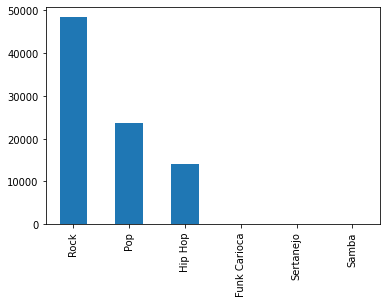

In [74]:
en_lyrics_df['Genre'].value_counts().plot(kind='bar')

##### Separação por gênero (rock)

In [75]:
en_rock_lyrics_df = en_lyrics_df.copy()

en_rock_lyrics_df.drop(
    en_rock_lyrics_df[en_rock_lyrics_df['Genre'] != "Rock"].index, inplace=True)

# en_rock_lyrics_df.to_csv(r"./english_rock_lyrics.csv")

en_rock_lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48379 entries, 133 to 207628
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ALink   48379 non-null  object
 1   SName   48379 non-null  object
 2   SLink   48379 non-null  object
 3   Lyric   48379 non-null  object
 4   Idiom   48379 non-null  object
 5   Genre   48379 non-null  object
dtypes: object(6)
memory usage: 2.6+ MB


#### Portugues

In [69]:
pt_lyrics_df = lyrics_df.copy()

pt_lyrics_df.drop(pt_lyrics_df[pt_lyrics_df['Idiom'] != "PORTUGUESE"].index,
                  inplace=True)

# pt_lyrics_df.to_csv(r"./portuguese_lyrics.csv")

pt_lyrics_df

,ALink,SName,SLink,Lyric,Idiom,Genre
370,/311/,Summer Of Love - Traducao,/311/summer-of-love-traducao.html,Eu pensei na minha cena hoje. E eu finalmente ...,PORTUGUESE,Rock
594,/4seres/,Morada,/4seres/morada.html,Tuas palavras que me fazem caminhar. No caminh...,PORTUGUESE,Rock
595,/a-corte-animal/,À Deriva,/a-corte-animal/a-deriva.html,Quando jovens por assim dizer. Não se é nada. ...,PORTUGUESE,Rock
596,/a-corte-animal/,À Flor da Pele Moderna,/a-corte-animal/a-flor-da-pele-moderna.html,Ó pequena minha pequena cidade grande. Se apro...,PORTUGUESE,Rock
597,/a-corte-animal/,"De Brasília, Com Amor",/a-corte-animal/de-brasilia-com-amor.html,Todo mês eu recebo. Cartas de um estranho. Mar...,PORTUGUESE,Rock
...,...,...,...,...,...,...
209516,/zeca-pagodinho/,Vôo de Paz,/zeca-pagodinho/voo-de-paz.html,Há qualquer coisa entre nós. Que nos priva de ...,PORTUGUESE,Samba
209518,/zeca-pagodinho/,Vou Procurar Esquecer,/zeca-pagodinho/vou-procurar-esquecer.html,Vou procurar um novo amor na minha vida. Porqu...,PORTUGUESE,Samba
209519,/zeca-pagodinho/,Vou Ver Juliana,/zeca-pagodinho/vou-ver-juliana.html,Quando a mare vazá. Vou vê juliana. Vou vê jul...,PORTUGUESE,Samba
209520,/zeca-pagodinho/,Yaô Cadê A Samba / Outro Recado / Hino,/zeca-pagodinho/yao-cade-a-samba-outro-recado-...,"Ô Yaô. Yaô, cadê a samba?. Está mangando na cu...",PORTUGUESE,Samba


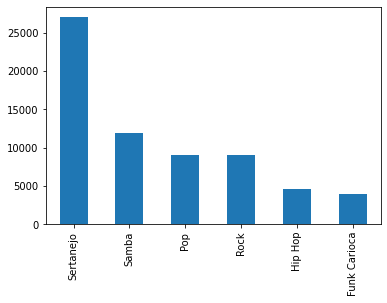

In [71]:
pt_lyrics_df['Genre'].value_counts().plot(kind='bar')

##### Separação por gênero (sertanejo)

In [77]:
pt_sert_lyrics_df = pt_lyrics_df.copy()

pt_sert_lyrics_df.drop(
    pt_sert_lyrics_df[pt_sert_lyrics_df['Genre'] != "Sertanejo"].index,
    inplace=True)

pt_sert_lyrics_df.to_csv(r"./portuguese_sertanejo_lyrics.csv")

pt_sert_lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27042 entries, 12775 to 201783
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ALink   27042 non-null  object
 1   SName   27042 non-null  object
 2   SLink   27042 non-null  object
 3   Lyric   27042 non-null  object
 4   Idiom   27042 non-null  object
 5   Genre   27042 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


### Exclusão de colunas desnecessárias

In [2]:
import pandas as pd

df = pd.read_csv(r"./english_rock_lyrics.csv")

df.head()

,Unnamed: 0,ALink,SName,SLink,Lyric,Idiom,Genre
0,133,/12-stones/,World So Cold,/12-stones/world-so-cold.html,"It starts with pain, followed by hate. Fueled ...",ENGLISH,Rock
1,134,/12-stones/,Broken,/12-stones/broken.html,Freedom!. Alone again again alone. Patiently w...,ENGLISH,Rock
2,135,/12-stones/,3 Leaf Loser,/12-stones/3-leaf-loser.html,"Biting the hand that feeds you, lying to the v...",ENGLISH,Rock
3,136,/12-stones/,Anthem For The Underdog,/12-stones/anthem-for-the-underdog.html,You say you know just who I am. But you can't ...,ENGLISH,Rock
4,137,/12-stones/,Adrenaline,/12-stones/adrenaline.html,My heart is beating faster can't control these...,ENGLISH,Rock


In [8]:
df.drop(columns=['ALink', 'SLink', 'Idiom', 'Genre'], inplace=True)

df.head()

,SName,Lyric
0,World So Cold,"It starts with pain, followed by hate. Fueled ..."
1,Broken,Freedom!. Alone again again alone. Patiently w...
2,3 Leaf Loser,"Biting the hand that feeds you, lying to the v..."
3,Anthem For The Underdog,You say you know just who I am. But you can't ...
4,Adrenaline,My heart is beating faster can't control these...


In [9]:
df.to_csv(r"english_rock_lyrics.csv", index=False)

In [10]:
df = pd.read_csv(r"./english_rock_lyrics.csv")

df.head()

,SName,Lyric
0,World So Cold,"It starts with pain, followed by hate. Fueled ..."
1,Broken,Freedom!. Alone again again alone. Patiently w...
2,3 Leaf Loser,"Biting the hand that feeds you, lying to the v..."
3,Anthem For The Underdog,You say you know just who I am. But you can't ...
4,Adrenaline,My heart is beating faster can't control these...


## Tarefas de treinamento e geração de letras

In [1]:
!wget https://github.com/PeterTowers/pankadaum-generator/raw/main/dataframes/english_rock_lyrics.csv

--2021-10-06 18:45:23--  https://github.com/PeterTowers/pankadaum-generator/raw/main/dataframes/english_rock_lyrics.csv
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PeterTowers/pankadaum-generator/main/dataframes/english_rock_lyrics.csv [following]
--2021-10-06 18:45:24--  https://raw.githubusercontent.com/PeterTowers/pankadaum-generator/main/dataframes/english_rock_lyrics.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56341476 (54M) [text/plain]
Saving to: ‘english_rock_lyrics.csv’

english_rock_lyrics 100%[===================>]  53.73M   153MB/s    in 0.4s    

2021-10-06 18:45:28 (153

In [11]:
df = pd.read_csv(r"./english_rock_lyrics.csv")

df.head()

,SName,Lyric
0,World So Cold,"It starts with pain, followed by hate. Fueled ..."
1,Broken,Freedom!. Alone again again alone. Patiently w...
2,3 Leaf Loser,"Biting the hand that feeds you, lying to the v..."
3,Anthem For The Underdog,You say you know just who I am. But you can't ...
4,Adrenaline,My heart is beating faster can't control these...


### Treinamento